<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:153: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:153: SyntaxWarning: invalid escape sequence '\d'
C:\Users\aryan rajput\AppData\Local\Temp\ipykernel_14876\3296856251.py:25: SyntaxWarning: invalid escape sequence '\d'
  data = load_csv_data("D:\data4.csv")
C:\Users\aryan rajput\AppData\Local\Temp\ipykernel_14876\3296856251.py:153: SyntaxWarning: invalid escape sequence '\d'
  data = load_csv_data("D:\data4.csv")


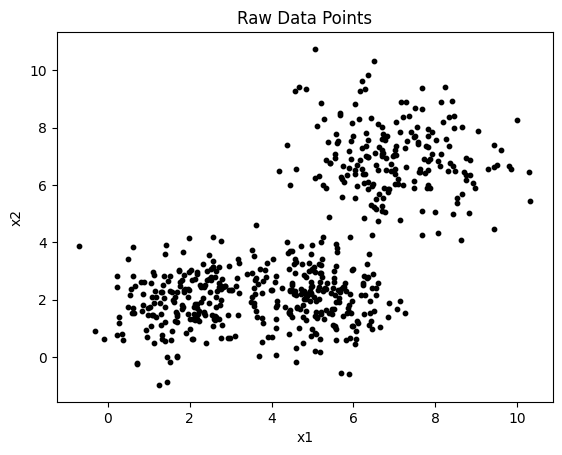

C:\Users\aryan rajput\AppData\Local\Temp\ipykernel_14876\3296856251.py:110: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', K)


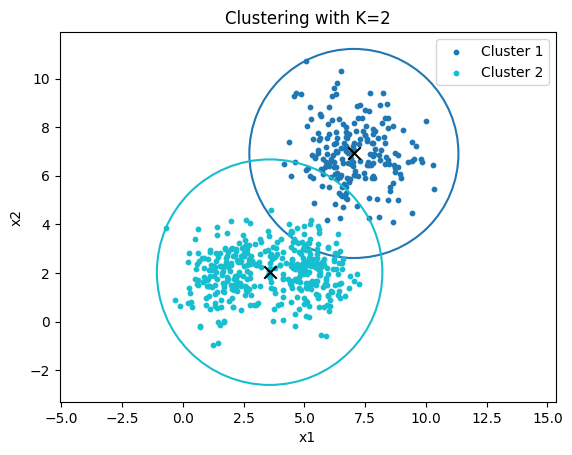

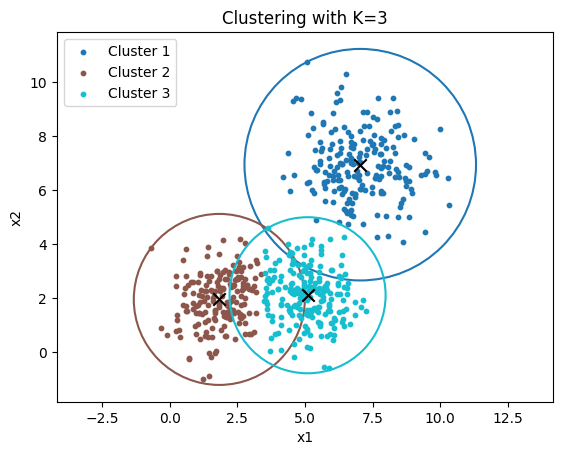

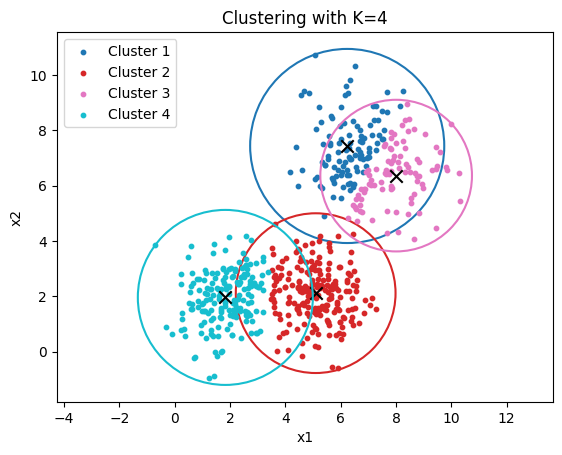

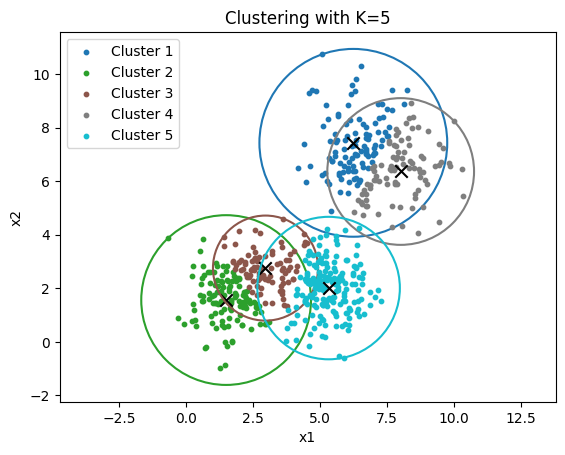

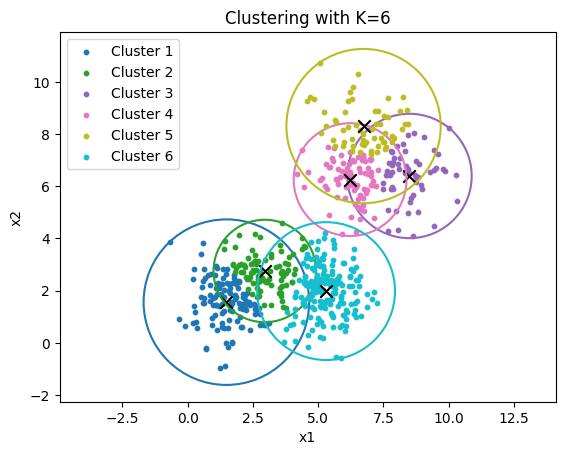

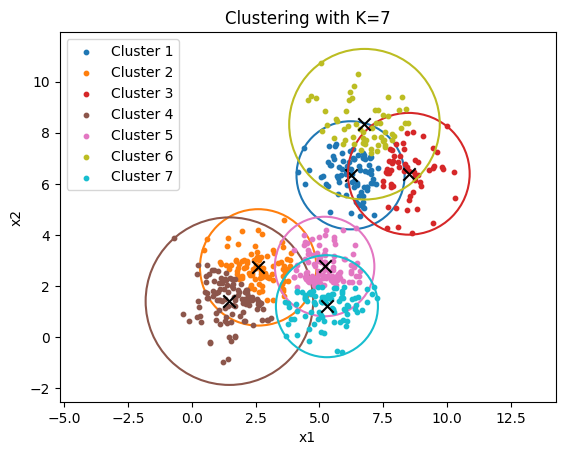

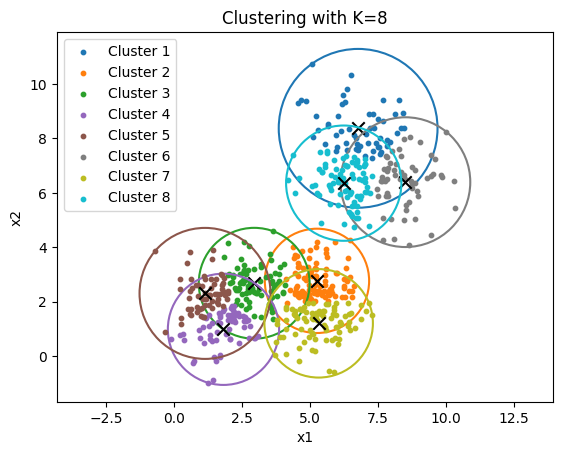

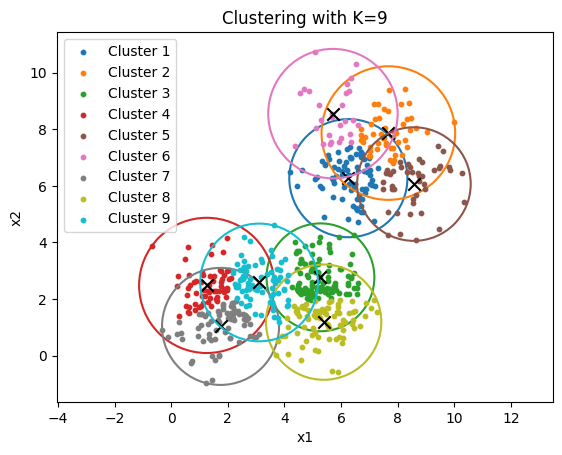

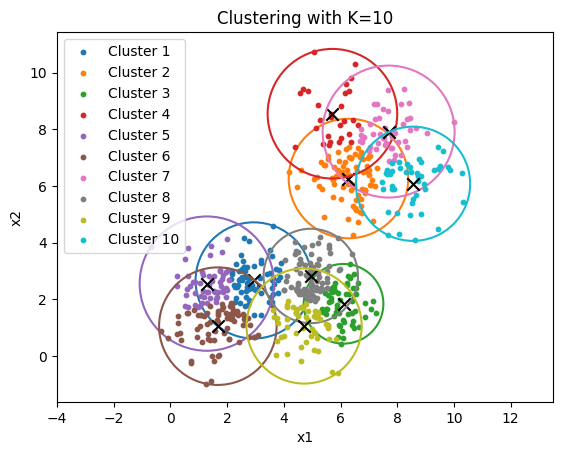

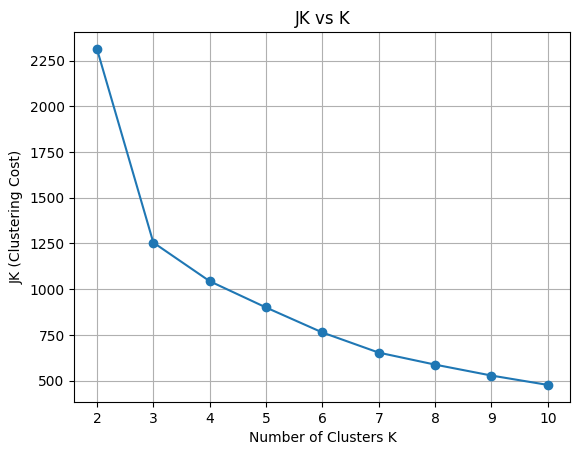


JK values for K = 2 to 10:
K = 2: JK = 2313.80
K = 3: JK = 1254.80
K = 4: JK = 1043.44
K = 5: JK = 899.59
K = 6: JK = 762.84
K = 7: JK = 652.73
K = 8: JK = 587.06
K = 9: JK = 527.30
K = 10: JK = 476.08


In [2]:
import matplotlib.pyplot as plt
import random
import math
import copy

# ======= PART A: Load and Display Data =======


def load_csv_data(filename):
    data = []
    with open(filename, 'r') as f:
        for line in f:
            # Strip whitespace and skip empty lines
            line = line.strip()
            if not line:
                continue
            try:
                row = list(map(float, line.split(',')))
                if len(row) == 2:  # Ensure p = 2
                    data.append(row)
            except ValueError:
                continue  # Skip lines that can't be converted to float
    return data

data = load_csv_data("D:\data4.csv")

def plot_raw_data(data):
    xs = [x[0] for x in data]
    ys = [x[1] for x in data]
    plt.scatter(xs, ys, s=10, color='black')
    plt.title("Raw Data Points")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

# ======= PART B: K-Means from Scratch =======

def distance(a, b):
    return math.sqrt(sum((a[i] - b[i]) ** 2 for i in range(len(a))))

def assign_clusters(data, centroids):
    labels = []
    for point in data:
        min_dist = float('inf')
        min_index = -1
        for i, centroid in enumerate(centroids):
            d = distance(point, centroid)
            if d < min_dist:
                min_dist = d
                min_index = i
        labels.append(min_index)
    return labels

def update_centroids(data, labels, K, p):
    centroids = [[0.0]*p for _ in range(K)]
    counts = [0]*K
    for idx, point in enumerate(data):
        cluster = labels[idx]
        counts[cluster] += 1
        for j in range(p):
            centroids[cluster][j] += point[j]
    for i in range(K):
        if counts[i] > 0:
            centroids[i] = [x / counts[i] for x in centroids[i]]
    return centroids

def compute_JK(data, centroids, labels):
    JK = 0.0
    for i, point in enumerate(data):
        JK += distance(point, centroids[labels[i]]) ** 2
    return JK

def compute_cluster_stats(data, labels, centroids, K):
    max_distances = [0.0] * K
    for idx, point in enumerate(data):
        cluster = labels[idx]
        d = distance(point, centroids[cluster])
        if d > max_distances[cluster]:
            max_distances[cluster] = d
    return max_distances

def k_means(data, K, p, runs=100, max_iters=100):
    N = len(data)
    best_JK = float('inf')
    best_centroids = []
    best_labels = []

    for _ in range(runs):
        initial_indices = random.sample(range(N), K)
        centroids = [copy.deepcopy(data[i]) for i in initial_indices]

        for _ in range(max_iters):
            labels = assign_clusters(data, centroids)
            new_centroids = update_centroids(data, labels, K, p)
            if new_centroids == centroids:
                break
            centroids = new_centroids

        JK = compute_JK(data, centroids, labels)
        if JK < best_JK:
            best_JK = JK
            best_centroids = copy.deepcopy(centroids)
            best_labels = copy.deepcopy(labels)

    return best_centroids, best_labels, best_JK

#  PART C: Plotting Clusters with Balls 

def plot_clusters(data, labels, centroids, max_distances, K):
    colors = plt.cm.get_cmap('tab10', K)
    for i in range(K):
        cluster_points = [data[j] for j in range(len(data)) if labels[j] == i]
        xs = [p[0] for p in cluster_points]
        ys = [p[1] for p in cluster_points]
        plt.scatter(xs, ys, s=10, color=colors(i), label=f"Cluster {i+1}")
        # Plot centroid
        plt.scatter(centroids[i][0], centroids[i][1], color='black', marker='x', s=80)
        # Plot circle
        circle = plt.Circle((centroids[i][0], centroids[i][1]), max_distances[i], color=colors(i), fill=False, linewidth=1.5)
        plt.gca().add_patch(circle)

    plt.title(f"Clustering with K={K}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.axis('equal')
    plt.show()

#  PART D: Run for K = 2 to 10 and Plot JK vs K 

def run_all_k(data):
    p = 2
    JK_values = []
    for K in range(2, 11):
        centroids, labels, JK = k_means(data, K, p)
        max_distances = compute_cluster_stats(data, labels, centroids, K)
        plot_clusters(data, labels, centroids, max_distances, K)
        JK_values.append(JK)

    # Plot JK vs K
    plt.plot(range(2, 11), JK_values, marker='o')
    plt.title("JK vs K")
    plt.xlabel("Number of Clusters K")
    plt.ylabel("JK (Clustering Cost)")
    plt.grid(True)
    plt.show()

    return JK_values

#  MAIN FUNCTION 

def main():
    data = load_csv_data("D:\data4.csv")
    plot_raw_data(data)
    JK_values = run_all_k(data)
    print("\nJK values for K = 2 to 10:")
    for k, jk in zip(range(2, 11), JK_values):
        print(f"K = {k}: JK = {jk:.2f}")

main()
